Exploratory Data Analysis 


In [2]:
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#datacleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\keerthi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Fliter for US Data Analyst Roles 

In [3]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

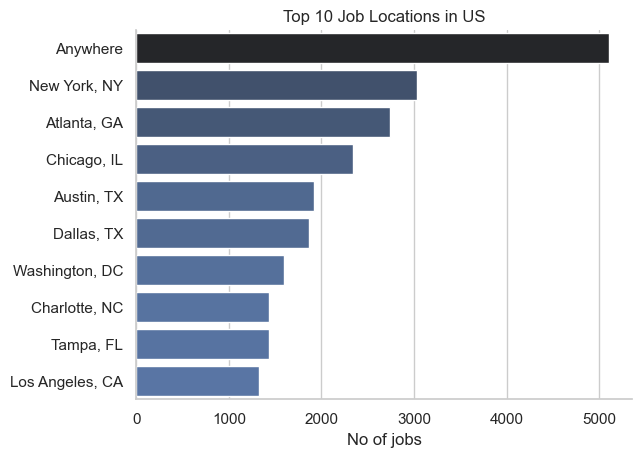

In [4]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='whitegrid')
sns.barplot(data=df_plot, x='count',y='job_location',hue = 'count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Top 10 Job Locations in US')
plt.xlabel('No of jobs')
plt.ylabel('')
plt.show()

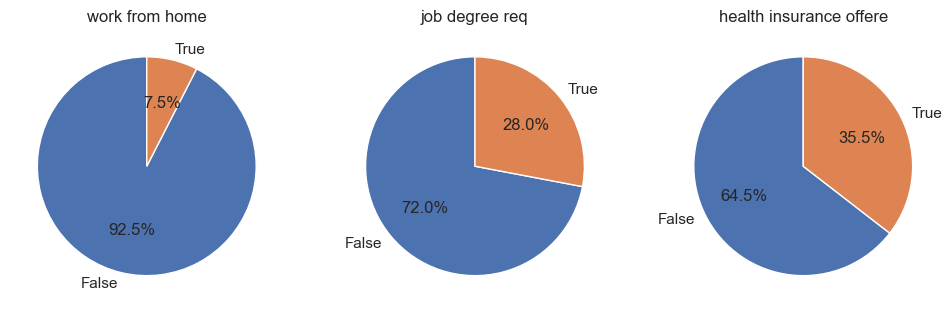

In [5]:
fig , ax = plt.subplots(1,3)
fig.set_size_inches((12,5))
dict_cloumn = {
    'job_work_from_home':'work from home',
    'job_no_degree_mention'  : 'job degree req',
    'job_health_insurance' : 'health insurance offere'
}
for i,(column,title) in enumerate(dict_cloumn.items()):
    ax[i].pie(df_DA_US[column].value_counts(),startangle =90,autopct = '%1.1f%%', labels = ['False','True'] )
    ax[i].set_title(title)  

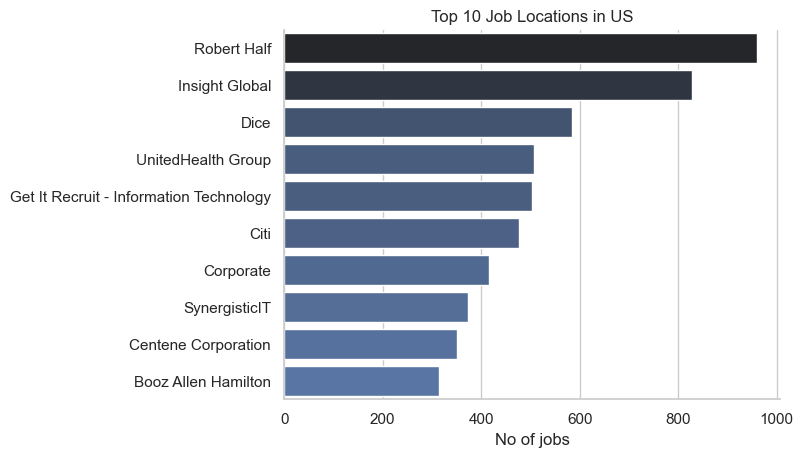

In [6]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='whitegrid')
sns.barplot(data=df_plot, x='count',y='company_name',hue = 'count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Top 10 Job Locations in US')
plt.xlabel('No of jobs')
plt.ylabel('')
plt.show()